In [1]:
import sys
from metatlas import h5_query as h5q, mzml_to_hdf
import numpy as np
import tables
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

In [2]:
myfile = '2015326_pHILIC_ACN_POS_MSMS_BN6_1062_SAR11_media_NoOsmolytes_PPLex_26_Run32.mzML'
filename = mzml_to_hdf(myfile)
fid = tables.open_file(filename)

In [3]:
rt, intensity = h5q.get_XIC(fid, 0, 1000, 1, 1)

Querying: (ms_level == 1) & (polarity == 1) & (mz >= 0) & (mz <= 1000)


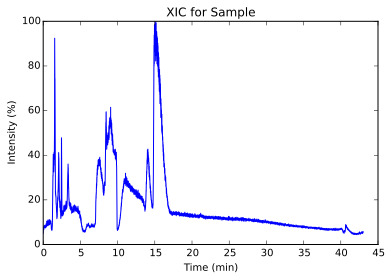

In [4]:
h5q.plot_xic(rt, intensity)
plt.show()

In [5]:
ms_level=2
polarity=1
data = h5q.get_data(fid, ms_level, polarity,
                    min_mz=0,
                    max_mz=160,
                    min_rt=8.2,
                    max_rt=8.8,
                    min_precursor_MZ=150.04,
                    max_precursor_MZ=150.07)

Querying: (ms_level == 2) & (polarity == 1) & (rt >= 8.2) & (rt <= 8.8) & (mz >= 0) & (mz <= 160) & (precursor_MZ >= 150.04) & (precursor_MZ <= 150.07)


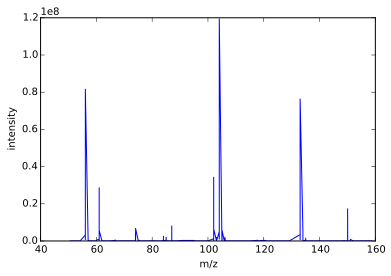

In [20]:
plt.xlabel('m/z')
plt.ylabel('intensity')
order = np.argsort(data['mz'])
plt.plot(data['mz'][order], data['i'][order])
plt.show()

In [11]:
mz_theor = 149.051024 + 1.007276

In [12]:
rt, intensity = h5q.get_XIC(fid, mz_theor - 0.1, mz_theor + 1, 1, 1)

Querying: (ms_level == 1) & (polarity == 1) & (mz >= 149.9583) & (mz <= 151.0583)


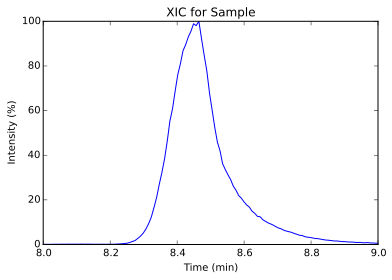

In [14]:
h5q.plot_xic(rt, intensity)
plt.xlim(8,9)
plt.show()

Querying: (ms_level == 1) & (polarity == 1)


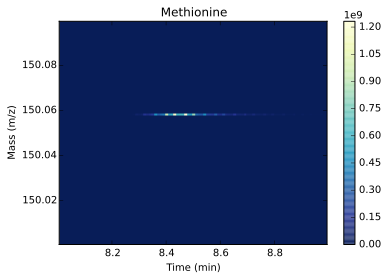

In [16]:
mzEdges = np.linspace(150, 150.1, 100)
rtEdges = np.linspace(8, 9, 100)
ms_level = 1
polarity = 1
hMap = h5q.get_HeatMapRTMZ(fid,mzEdges,rtEdges,ms_level,polarity)
h5q.plot_heatmap(hMap['arr'], hMap['rt_bins'], hMap['mz_bins'], title='Methionine')

Querying: (ms_level == 2) & (polarity == 1) & (rt >= 8.2) & (rt <= 8.8) & (precursor_MZ >= 150.04) & (precursor_MZ <= 150.07)


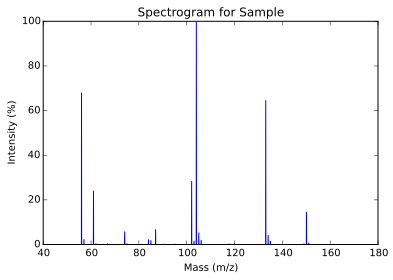

In [23]:
ms_level=2
polarity=1
min_rt = 8.2
max_rt = 8.8
mz, intensity = h5q.get_spectrogram(fid, min_rt, max_rt, ms_level, polarity,
                    min_precursor_MZ=150.04,
                    max_precursor_MZ=150.07)
h5q.plot_spectrogram(mz, intensity)